In [1]:
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
features = ["ALQ101", "ALQ110", "ALQ130", "ALQ141Q", "ALQ151", "AUQ154", "BPQ020", "BPQ080", "CDQ010", "CBD120", "DIQ010", "DIQ160", "DIQ170", "DIQ175N",
            "ECD070A", "MCQ080", "MCQ092", "MCQ220", "MCQ300c", "MCQ365c", "MCQ365d", "SMQ020", "SMD030", "SMQ040", "SMD415", "SMD415A", "RIAGENDR", "RIDAGEYR",
            "RIDRETH3", "DMQMILIZ", "DMQADFC", "DMDBORN4", "DMDCITZN", "DMDYRSUS", "DMDEDUC3", "DMDEDUC2", "DMDMARTL", "RIDEXPRG", "INDHHIN2", "DMDHHSIZ", "DMDFMSIZ",
            "DMDHHSZA", "DMDHHSZB", "DMDHHSZE", "DR1CCMTX", "DR1FS", "DR1_040Z", "DRQSDIET", "DRQSDT1", "DRQSDT2", "DRQSDT3", "DRQSDT4", "DRQSDT5", "DRQSDT6", "DRQSDT7",
            "DRQSDT8", "DRQSDT9", "DRQSDT10", "DRQSDT11", "DRQSDT12", "DRQSDT91", "BMXWT", "BMXHT", "BMXWAIST", "ENQ010", "ENQ020", "SPQ010", "SPQ020", "SPQ040", "SPQ060",
            "SPQ070d", "SPQ070e", "ENQ100", "RHQ131", "RHD143", "LBDGLUSI", "LBXIN"]
len(features)

77

In [6]:
BMX_G_DF = pd.read_csv("csvs/BMX_G.csv")
BMX_G_DF = BMX_G_DF[["SEQN", "BMXWT", "BMXHT", "BMXWAIST"]]
BMX_G_DF.dropna(inplace=True)

DEMO_G_DF = pd.read_csv("csvs/DEMO_G (1).csv")
DEMO_G_DF = DEMO_G_DF[["SEQN", "RIAGENDR", "RIDAGEYR"]]

GLU_G_DF = pd.read_csv("csvs/GLU_G.csv")
GLU_G_DF = GLU_G_DF[["SEQN", "LBDGLUSI", "LBXIN"]]
GLU_G_DF["HOMA-IR"]  = GLU_G_DF["LBDGLUSI"] * GLU_G_DF["LBXIN"] / 22.5
GLU_G_DF.drop(columns=["LBDGLUSI", "LBXIN"], inplace=True)

DIQ_G_DF = pd.read_csv("csvs/DIQ_G.csv")
DIQ_G_DF = DIQ_G_DF[["SEQN", "DIQ170"]]

MCQ_G_DF = pd.read_csv("csvs/MCQ_G.csv")
MCQ_G_DF = MCQ_G_DF[["SEQN", "MCQ300C"]]

DR1TOT_G_DF = pd.read_csv("csvs/DR1TOT_G.csv")
DR1TOT_G_DF = DR1TOT_G_DF[["SEQN", "DRQSDIET"]]


merged_df = pd.merge(BMX_G_DF, GLU_G_DF, on="SEQN", how="inner")
merged_df = pd.merge(merged_df, DEMO_G_DF, on="SEQN", how="inner")
#merged_df = pd.merge(merged_df, DIQ_G_DF, on="SEQN", how="inner")
#merged_df = pd.merge(merged_df, MCQ_G_DF, on="SEQN", how="inner")
#merged_df = pd.merge(merged_df, DR1TOT_G_DF, on="SEQN", how="inner")




homa_ir = merged_df.pop("HOMA-IR")
merged_df["HOMA-IR"] = homa_ir

merged_df.drop_duplicates(inplace=True)
merged_df.dropna(inplace=True)
print(merged_df.count())
print(merged_df.head())
merged_df.dropna(inplace=True)
merged_df = merged_df.iloc[:, 1:]
scaler = StandardScaler()
merged_df[merged_df.columns] = scaler.fit_transform(merged_df[merged_df.columns])

# merged_df["HOMA-IR"] = merged_df["HOMA-IR"].apply(lambda x: 1 if x > 0 else 0)

# with open("num_features.txt", "w") as f:
#     f.write(str(len(merged_df.columns) - 1))

# class_counts = merged_df["HOMA-IR"].value_counts()
# print("Class Imbalance:")
# print(class_counts)


# class_percentage = merged_df["HOMA-IR"].value_counts(normalize=True) * 100
# print("\nClass Percentage Distribution:")
# print(class_percentage)

# class_0 = merged_df[merged_df["HOMA-IR"] == 0]
# class_1 = merged_df[merged_df["HOMA-IR"] == 1]

# minority_size = min(len(class_0), len(class_1))
# balanced_class_0 = class_0.sample(n=minority_size, random_state=42)
# balanced_class_1 = class_1.sample(n=minority_size, random_state=42)

# merged_df = pd.concat([balanced_class_0, balanced_class_1]).reset_index(drop=True)

# merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True)

# print("Balanced Class Distribution:")
# print(merged_df["HOMA-IR"].value_counts())



# class_percentage = merged_df["HOMA-IR"].value_counts(normalize=True) * 100
# print(class_percentage)


merged_df.to_csv('subsample.csv', index=False)

SEQN        2761
BMXWT       2761
BMXHT       2761
BMXWAIST    2761
RIAGENDR    2761
RIDAGEYR    2761
HOMA-IR     2761
dtype: int64
      SEQN  BMXWT  BMXHT  BMXWAIST  RIAGENDR  RIDAGEYR   HOMA-IR
0  62161.0   69.2  172.3      81.0       1.0      22.0  4.233136
1  62164.0   67.2  170.1      80.1       2.0      44.0  0.710112
2  62165.0   69.1  159.4      86.7       2.0      14.0  3.332656
3  62169.0   54.6  164.8      69.6       1.0      21.0  2.544960
4  62170.0   63.5  187.0      69.4       1.0      15.0  2.227307


<Axes: >

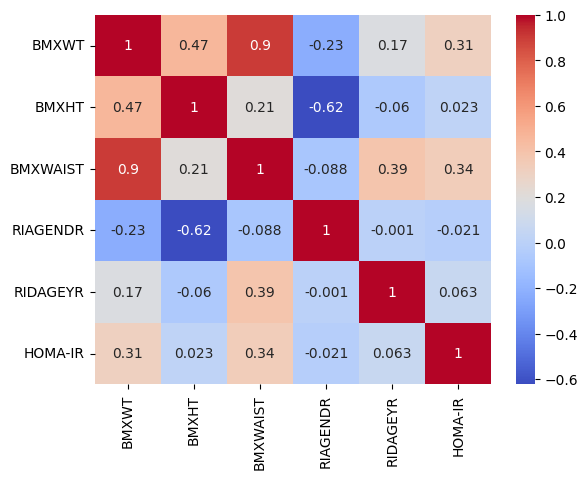

In [7]:
df = pd.read_csv("subsample.csv")
import seaborn as sns

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
df = pd.read_csv("csvs/DEMO_G (1).csv")
df = df[["SEQN", "RIAGENDR"]]

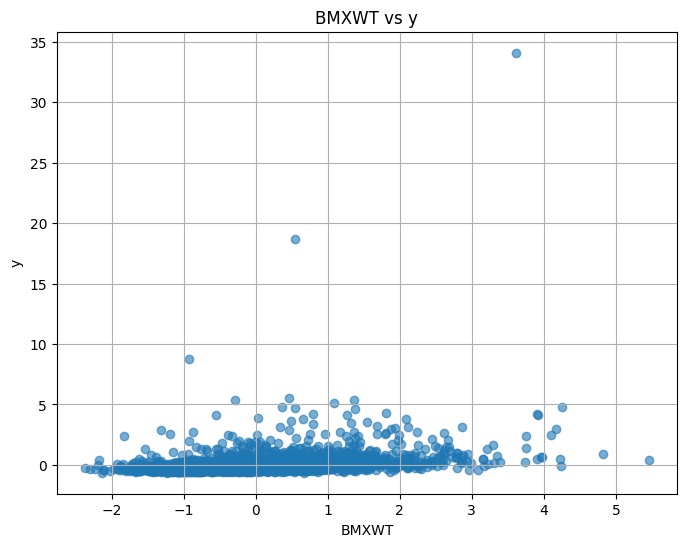

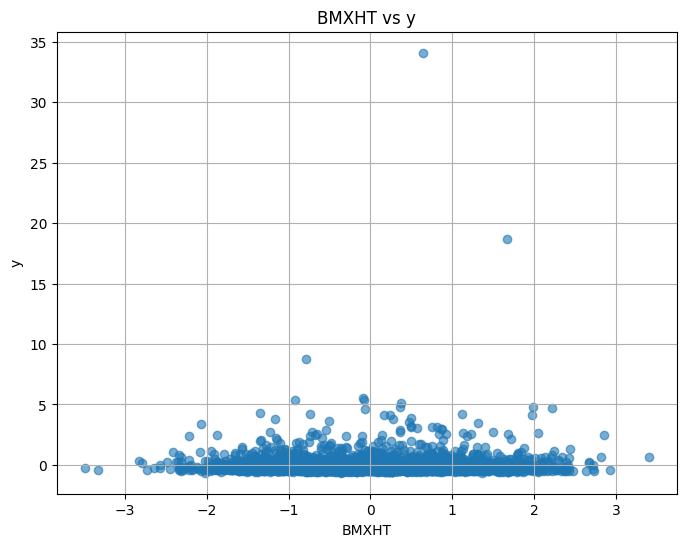

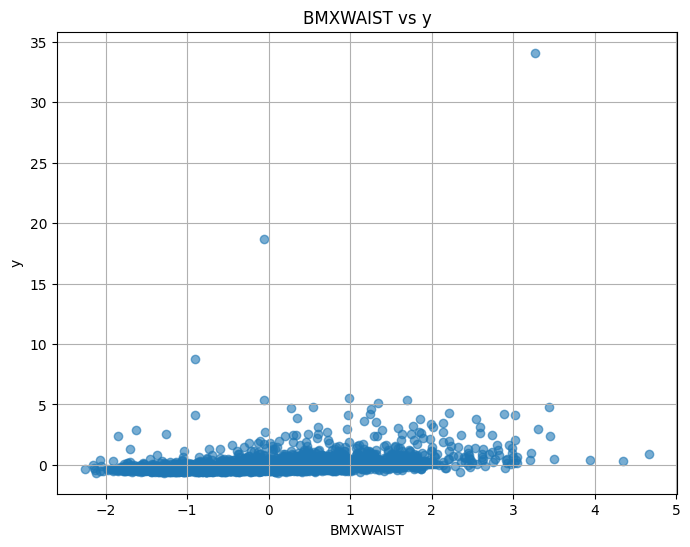

In [171]:
for col in df.columns[:-1]:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[col], df['HOMA-IR'], alpha=0.6)

    plt.title(f'{col} vs y')
    plt.xlabel(col)
    plt.ylabel('y')
    plt.grid(True)
    plt.show()


In [172]:
merged_df.describe()

,BMXWT,BMXHT,BMXWAIST,HOMA-IR
count,2.761000e+03,2.761000e+03,2.761000e+03,2.761000e+03
mean,-3.541776e-16,1.488768e-15,2.811546e-16,-1.286749e-16
std,1.000181e+00,1.000181e+00,1.000181e+00,1.000181e+00
min,-2.369180e+00,-3.486057e+00,-2.251649e+00,-6.543753e-01
25%,-7.238140e-01,-7.118164e-01,-7.623857e-01,-3.898978e-01
50%,-1.062124e-01,-1.825625e-02,-4.661566e-02,-2.176555e-01
75%,5.679635e-01,6.855033e-01,6.056586e-01,1.079360e-01
max,5.456917e+00,3.398547e+00,4.663613e+00,3.410307e+01
